# <font style = "color:rgb(50,120,229)">Auto Focus Assignment</font>

In [4]:
# Import modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.interpolation'] = 'bilinear'

## <font style = "color:rgb(50,120,229)">Methods</font>

Two implementec measures of focus:

1. **Variance of absolute values of Laplacian** - `var_abs_laplacian` function

2. **Sum Modified Laplacian (SML)** - `sum_modified_laplacian` function


In [46]:
# Implement Variance of absolute values of Laplacian 

def var_abs_laplacian(image):
    laplacian = cv2.Laplacian(image, cv2.CV_32F, ksize = 3, scale = 1, delta = 0) #calculate laplacian
    mean_abs_laplacian = np.mean(np.abs(laplacian)) #calculate mean of absolute values of laplacian
    variance_of_abs_vals = np.var(np.abs(laplacian-mean_abs_laplacian)) #calculate variance of absolute values of (laplacian-mean_abs_laplacian)
    return variance_of_abs_vals

In [47]:
# Implement Sum Modified Laplacian

def sum_modified_laplacian(im):
    kernel_x = np.array([[0,0,0],[-1,2,-1],[0,0,0]])
    kernel_y = np.array([[0,-1,0],[0,2,0],[0,-1,0]])
    laplacian_x = cv2.filter2D(im, -1, kernel_x, (-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
    laplacian_y = cv2.filter2D(im, -1, kernel_y, (-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
    modified_laplacian = np.abs(laplacian_x)+np.abs(laplacian_y)
    sum_modified_laplacian = np.sum(modified_laplacian)
    return sum_modified_laplacian

Let's have a look at the input video.

&nbsp;

<center>
<video controls width=800 src="focus-test.mp4" type="video/mp4" />
</center>

Total number of frames : 186
Frame ID of the best frame [Method 1]: 1
Frame ID of the best frame [Method 2]: 1
Frame ID of the best frame [Method 2]: 1
Frame ID of the best frame [Method 2]: 1
Frame ID of the best frame [Method 2]: 1
Frame ID of the best frame [Method 1]: 53
Frame ID of the best frame [Method 2]: 53
Frame ID of the best frame [Method 1]: 57
Frame ID of the best frame [Method 2]: 57
Frame ID of the best frame [Method 1]: 61
Frame ID of the best frame [Method 2]: 61
Frame ID of the best frame [Method 1]: 65
Frame ID of the best frame [Method 2]: 65
Frame ID of the best frame [Method 1]: 69
Frame ID of the best frame [Method 2]: 69
Frame ID of the best frame [Method 1]: 73
Frame ID of the best frame [Method 2]: 73
Frame ID of the best frame [Method 1]: 75
Frame ID of the best frame [Method 2]: 75
Frame ID of the best frame [Method 1]: 78
Frame ID of the best frame [Method 2]: 78
Frame ID of the best frame [Method 1]: 79
Frame ID of the best frame [Method 2]: 79
Frame ID o

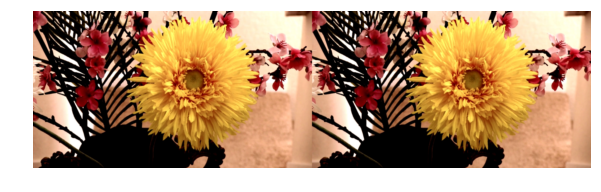

In [48]:
# Read input video filename
filename = 'focus-test.mp4'

# Create a VideoCapture object
cap = cv2.VideoCapture(filename)

# Read first frame from the video
ret, frame = cap.read()

# Display total number of frames in the video
print("Total number of frames : {}".format(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

maxV1 = 0
maxV2 = 0

# Frame with maximum measure of focus
# Obtained using methods 1 and 2
bestFrame1 = 0 
bestFrame2 = 0 

# Frame ID of frame with maximum measure
# of focus
# Obtained using methods 1 and 2
bestFrameId1 = 0 
bestFrameId2 = 0 

# Get measures of focus from both methods
val1 = var_abs_laplacian(frame)
val2 = sum_modified_laplacian(frame)

# Specify the ROI for flower in the frame
# UPDATE THE VALUES BELOW
top = 410
left = 1050
bottom = frame.shape[0]
right = 650

# Iterate over all the frames present in the video
while(ret):
    # Crop the flower region out of the frame
    flower = frame[left:right, top:bottom]
    # Get measures of focus from both methods
    val1 = var_abs_laplacian(frame)
    val2 = sum_modified_laplacian(frame)
    
    # If the current measure of focus is greater 
    # than the current maximum
    if val1 > maxV1 :
        # Revise the current maximum
        maxV1 = val1
        # Get frame ID of the new best frame
        bestFrameId1 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame1 = frame.copy()
        print("Frame ID of the best frame [Method 1]: {}".format(bestFrameId1))

    # If the current measure of focus is greater 
    # than the current maximum
    if val2 > maxV2 : 
        # Revise the current maximum
        maxV2 = val2
        # Get frame ID of the new best frame
        bestFrameId2 = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        # Revise the new best frame
        bestFrame2 = frame.copy()
        print("Frame ID of the best frame [Method 2]: {}".format(bestFrameId1))
        
    # Read a new frame
    ret, frame = cap.read()


print("================================================")
# Print the Frame ID of the best frame
print("Frame ID of the best frame [Method 1]: {}".format(bestFrameId1))
print("Frame ID of the best frame [Method 2]: {}".format(bestFrameId2))

# Release the VideoCapture object
cap.release()

# Stack the best frames obtained using both methods
out = np.hstack((bestFrame1, bestFrame2))

# Display the stacked frames
plt.figure()
plt.imshow(out[:,:,::-1]);
plt.axis('off');